<a href="https://colab.research.google.com/github/hazelkozlu/CoreDemo/blob/master/makalemobilenetson_ipynb_adl%C4%B1_dosyan%C4%B1n_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#google drive bağlantısı için
from  google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/Colab Notebooks/

Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# Veri yolu ve parametreleri

train_data_dir = 'TezVeriSeti/train'
test_data_dir = 'TezVeriSeti/valid'
img_width, img_height = 224, 224   # MobileNetV2 giriş boyutu
batch_size = 32
epochs = 20  # Increase the number of epochs
num_classes = 4   # Toplam sınıf sayısı

# Veri artırma ve ön işleme
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,        # More rotation
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# MobileNetV2 modelini yükleyin (weights='imagenet' ile önceden eğitilmiş ağırlıkları yükle)
base_model = MobileNetV2(input_shape=(img_width, img_height, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# Transfer Öğrenme yaparak yeni sınıflandırma katmanlarını ekleyin
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),  # Increase the number of units
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),  # Add another Dense layer
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Modeli derleme ve öğrenme oranı düşürme
initial_learning_rate = 0.01
lr_schedule = LearningRateScheduler(lambda epoch: initial_learning_rate * 0.9 ** epoch)
optimizer = Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model eğitimi
model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[lr_schedule]
)


Found 958 images belonging to 4 classes.
Found 960 images belonging to 4 classes.
9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 685s 23s/step - loss: 1.0001 - accuracy: 0.6190 - val_loss: 0.8095 - val_accuracy: 0.7375 - lr: 0.0100
Epoch 2/20
30/30 [==============================] - 111s 4s/step - loss: 0.6019 - accuracy: 0.7516 - val_loss: 0.5567 - val_accuracy: 0.7667 - lr: 0.0090
Epoch 3/20
30/30 [==============================] - 143s 5s/step - loss: 0.5401 - accuracy: 0.7599 - val_loss: 0.5922 - val_accuracy: 0.7646 - lr: 0.0081
Epoch 4/20
30/30 [==============================] - 118s 4s/step - loss: 0.5039 - accuracy: 0.7944 - val_loss: 0.4519 - val_accuracy: 0.8073 - lr: 0.0073
Epoch 5/20
30/30 [==============================] - 141s 5s/step - loss: 0.4396 - accuracy: 0.8058 - val_loss: 0.3906 - val_accuracy: 0.8406 - lr: 0.0066
Epoch 6/20
30/30 [==============================] - 142s 5s/step - loss: 0.4454 - ac

In [3]:
# Modeli değerlendirme
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Modeli kaydetme
model.save("mobilnetv2.h5")
print("Model başarıyla kaydedildi.")

# Yeni görüntüleri tahmin etme
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_leaf_disease(image_path):
    img = image.load_img(image_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Tahmin
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction[0])   # En yüksek olasılığa sahip sınıfın dizini
    class_labels = train_generator.class_indices   # Sınıf etiketlerini alın
    class_label = list(class_labels.keys())[list(class_labels.values()).index(class_index)]   # Sınıf etiketini alın
    print(f"Tahmin: {class_label}, Olasılık: {prediction[0][class_index]}")

# Test için yeni bir görüntü tahmini
##test_image_path = 'TezVeriSeti/valid/yaprakdelen/delendog (1).png'
test_image_path = 'TezVeriSeti/test1/test - Kopya/IMG_20220703_130251-256 b1 (145).png'

predict_leaf_disease(test_image_path)

30/30 [==============================] - 51s 2s/step - loss: 0.2579 - accuracy: 0.9146
Test Loss: 0.257927268743515, Test Accuracy: 0.9145833253860474
Model başarıyla kaydedildi.
1/1 [==============================] - 1s 1s/step
Tahmin: yaprakdelen, Olasılık: 0.872376024723053


In [4]:
# Diğer importlar...
from sklearn.metrics import confusion_matrix, classification_report


# Modeli değerlendirme
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Karışıklık matrisini elde etme
test_generator.reset()  # Test veri kümesini sıfırlayın
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Karışıklık matrisini oluşturma
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
print("Karışıklık Matrisi:")
print(confusion_mtx)

# Sınıflandırma raporunu elde etme ve yazdırma
class_labels = list(test_generator.class_indices.keys())
print("Sınıflandırma Raporu:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


30/30 [==============================] - 48s 2s/step - loss: 0.2579 - accuracy: 0.9146
Test Loss: 0.257927268743515, Test Accuracy: 0.9145833253860474
30/30 [==============================] - 46s 2s/step
Karışıklık Matrisi:
[[240   0   0   0]
 [  0 204   9  27]
 [  0   0 231   9]
 [  0  15  22 203]]
Sınıflandırma Raporu:
               precision    recall  f1-score   support

      kulleme       1.00      1.00      1.00       240
potasyumeksik       0.93      0.85      0.89       240
     saglikli       0.88      0.96      0.92       240
  yaprakdelen       0.85      0.85      0.85       240

     accuracy                           0.91       960
    macro avg       0.92      0.91      0.91       960
 weighted avg       0.92      0.91      0.91       960



30/30 [==============================] - 44s 1s/step - loss: 0.2579 - accuracy: 0.9146
Test Loss: 0.257927268743515, Test Accuracy: 0.9145833253860474
30/30 [==============================] - 44s 1s/step


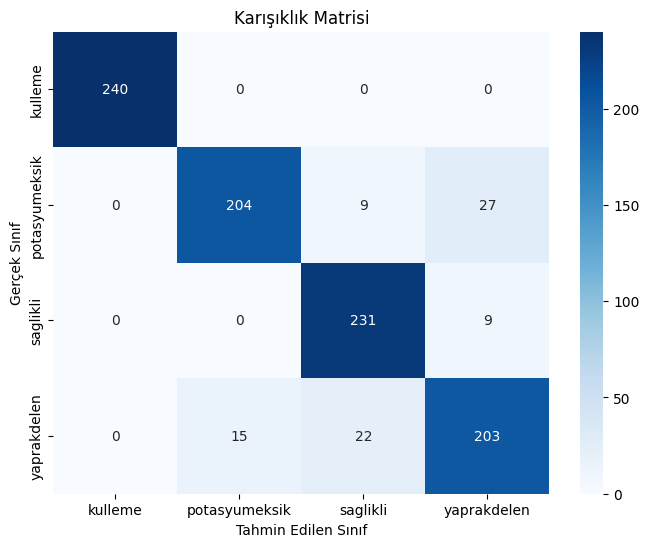

Sınıflandırma Raporu:
               precision    recall  f1-score   support

      kulleme       1.00      1.00      1.00       240
potasyumeksik       0.93      0.85      0.89       240
     saglikli       0.88      0.96      0.92       240
  yaprakdelen       0.85      0.85      0.85       240

     accuracy                           0.91       960
    macro avg       0.92      0.91      0.91       960
 weighted avg       0.92      0.91      0.91       960



In [5]:
# Diğer importlar...
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Modeli değerlendirme
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Karışıklık matrisini elde etme
test_generator.reset()  # Test veri kümesini sıfırlayın
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Karışıklık matrisini oluşturma
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karışıklık Matrisi')
plt.show()

# Sınıflandırma raporunu elde etme ve yazdırma
class_labels = list(test_generator.class_indices.keys())
print("Sınıflandırma Raporu:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))
